#Classificação de imagens de dígitos escritos à mão

Objetivos: 
- Visualização e interpretação dos dados
- Criação e treinamento do modelo de rede neural artificial
- Teste no conjunto de teste

Tópicos extras
- Trocar a rede neural simples por uma rede neural convolucional
- Criar uma matriz de confusão para avaliar a qualidade das classificações. Utilize também o método confusion_matrix dentro do módulo sklearn.metrics

In [36]:
# Importação das bibliotecas
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

In [37]:
# Criando funções para plotar as imagens e os gráficos de barras com as 
# probabilidades por classe
def plot_image(i, predicoes, true_labels, images):
  true_label, img = true_labels[i], images[i]
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap='gray')
  probability = np.max(predicoes[i])
  predicted_label = np.argmax(predicoes[i])

  plt.xlabel(f'{predicted_label}: {100*probability:2.0f}%')


def plot_value_array(i, predicoes, true_labels):
  true_label = true_labels[i]
  this_plot = plt.bar(range(10), predicoes[i])
  plt.xticks(range(10))
  plt.yticks([])
  plt.ylim([0, 1])
  predicted_label = np.argmax(predicoes[i])
  this_plot[predicted_label].set_color('blue')
  this_plot[true_label].set_color('red')

## Conjunto de dados

- O conjunto de dados MNIST contém 60.000 exemplos de treinamento e 10.000 exemplos de teste de dígitos manuscritos que já estão classificados corretamente.
- Estas imagens têm uma resolução de 28x28 pixels.
- Será utilizado o módulo keras para carregar o conjunto de dados.
- Para obter o conjunto de dados, acessamos o objeto mnist de keras.datasets.
- Em seguida, chamamos o conjunto de dados load_function. Essa função automaticamente divide os dados adequadamente e retorna uma tupla com os dados de treinamento e uma tupla com os dados de teste.

In [38]:
mnist = tf.keras.datasets.mnist

In [39]:
# Carregando e preparando os dados depois de entender sua estrutura
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = mnist.load_data()

In [40]:
# verificando as divisões e seus tamanhos
print('Tamanho do imagens_treino:', imagens_treino.shape)
print('Tamanho do labels_treino:',labels_treino.shape)
print('Tamanho do imagens_teste:',imagens_teste.shape)
print('Tamanho do labels_teste:',labels_teste.shape)

Tamanho do imagens_treino: (60000, 28, 28)
Tamanho do labels_treino: (60000,)
Tamanho do imagens_teste: (10000, 28, 28)
Tamanho do labels_teste: (10000,)


In [41]:
# Verificando a quantidade de cada elemento da label de treino
np.unique(labels_treino, return_counts =True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

## Plotando os dados

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


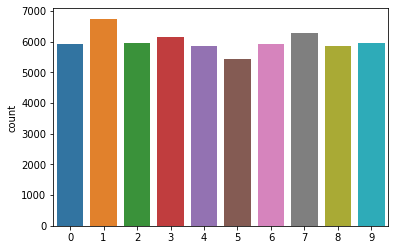

In [42]:
# Visualizando a quantidade de cada elemento da label de treino
sns.countplot(labels_treino)

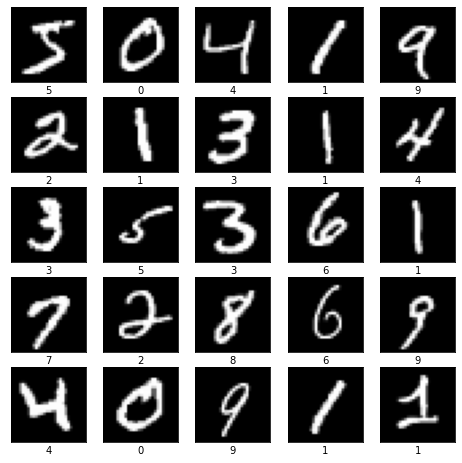

In [43]:
# Visualinzando os primeiros 25 elementos dos dados de treino
plt.figure(figsize=(8, 8))
for i in range (25):
  plt.subplot(5, 5, i+1)
  plt.imshow(imagens_treino[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(labels_treino[i])
  plt.grid(False)
plt.show()

## Normalizando os dados

In [44]:
imagens_treino = tf.keras.utils.normalize(imagens_treino, axis=1)
imagens_teste = tf.keras.utils.normalize(imagens_teste, axis=1)

## Criando o modelo

In [45]:
model = tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(128, activation='relu'),
                            tf.keras.layers.Dense(10)
    
])

In [46]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [48]:
treino = model.fit(x=imagens_treino, y=labels_treino, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3210 - accuracy: 0.9108
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1460 - accuracy: 0.9572
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0995 - accuracy: 0.9703
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0737 - accuracy: 0.9778
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0570 - accuracy: 0.9831
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0446 - accuracy: 0.9866
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0353 - accuracy: 0.9900
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0281 - accuracy: 0.9921
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0220 - accuracy: 0.9936
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.017

In [49]:
treino.history.keys()

dict_keys(['loss', 'accuracy'])

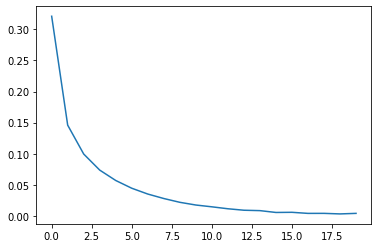

In [50]:
# Visualizando o erro ao longo das épocas nos dados de treino
plt.plot(treino.history['loss'])

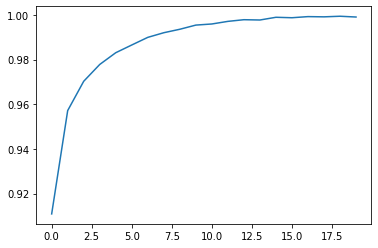

In [51]:
# Visualizando a acurácia ao longo das épocas nos dados de treino
plt.plot(treino.history['accuracy'])

Observando os dois gráficos acima, podemos perceber que a partir da época 15 os dados mantiveram uma certa estabilidade, o que significa que provavelmente se forem acrescentadas mais épocas não fará diferença em relação a melhorias do modelo.

## Previsões com os dados de teste

In [52]:
# Avaliando a performance no conjunto de teste
test_loss, test_accuracy = model.evaluate(imagens_teste, labels_teste)
print(f'Acuracia do modelo no conjunto de teste: {test_accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.1054 - accuracy: 0.9766
Acuracia do modelo no conjunto de teste: 0.9765999913215637


In [53]:
# mesmo modelo com uma camada para diminuir os valores (transforma em uma probabilidade)
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [54]:
predicoes = probability_model.predict(imagens_teste)
predicoes 

313/313 [==============================] - 1s 2ms/step


array([[1.5673204e-15, 7.0772337e-21, 2.7252261e-16, ..., 9.9999994e-01,
        1.4229045e-13, 5.9640159e-14],
       [7.5378597e-15, 1.0455749e-06, 9.9999887e-01, ..., 2.7980883e-24,
        1.5419320e-14, 6.5083083e-31],
       [1.2563016e-11, 9.9999970e-01, 7.1422583e-09, ..., 2.1562581e-09,
        2.1184582e-07, 4.0896593e-16],
       ...,
       [3.9855194e-22, 7.6186658e-15, 2.7609032e-19, ..., 3.3421935e-10,
        2.6557700e-10, 9.6289476e-08],
       [1.5203283e-14, 6.9726852e-16, 1.2215569e-15, ..., 1.0781864e-12,
        3.8448800e-07, 2.4623434e-18],
       [1.4218507e-11, 2.0121952e-15, 5.9949206e-15, ..., 1.9187858e-20,
        1.8470364e-15, 7.1803082e-18]], dtype=float32)

In [55]:
predicoes[0]

array([1.5673204e-15, 7.0772337e-21, 2.7252261e-16, 7.9000184e-09,
       8.1239919e-23, 1.7685266e-18, 1.6285629e-29, 9.9999994e-01,
       1.4229045e-13, 5.9640159e-14], dtype=float32)

In [56]:
# Armazenando apenas o valor com maior probabilidade de acerto. 
labels_preditas = predicoes.argmax(axis=1) 

In [57]:
labels_preditas

array([7, 2, 1, ..., 4, 5, 6])

## Visualização gráfica das predições

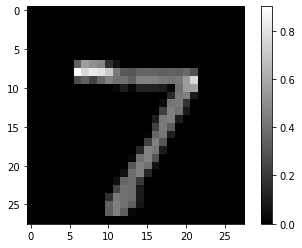

In [58]:
# Visualizando a primeira imagem do conjunto de teste
plt.figure()
plt.imshow(imagens_teste[0], cmap='gray')
plt.colorbar()
plt.show()

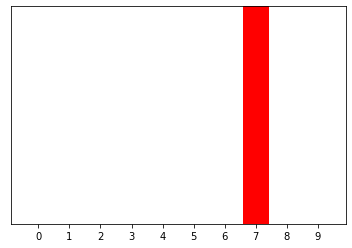

In [59]:
plot_value_array(0, predicoes, labels_teste)

## Observando as predições para diversas imagens do conjunto de teste, usando as funções criadas anteriormente:

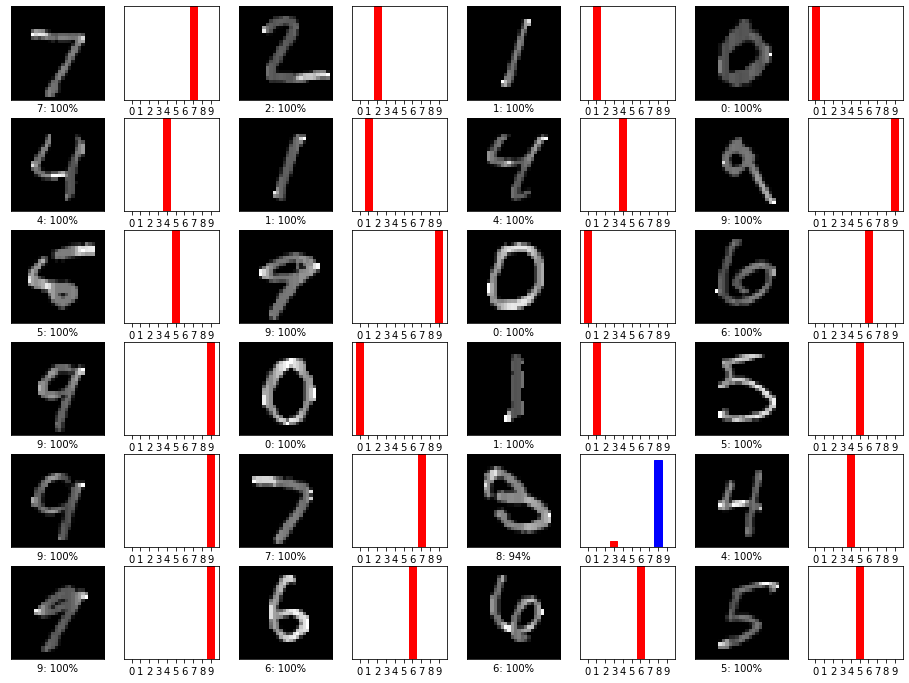

In [60]:
num_rows = 6
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(4*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predicoes, labels_teste, imagens_teste)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predicoes, labels_teste)
plt.show()

In [61]:
# Verificando a matrix de confusão do modelo
cm = confusion_matrix(labels_teste, labels_preditas)
cm

array([[ 972,    0,    0,    1,    1,    1,    1,    1,    3,    0],
       [   0, 1123,    4,    1,    0,    0,    1,    1,    5,    0],
       [   6,    2,  995,    7,    2,    0,    1,    5,   14,    0],
       [   1,    0,    1,  990,    0,    6,    0,    4,    2,    6],
       [   1,    0,    5,    1,  961,    0,    2,    3,    2,    7],
       [   2,    0,    2,   11,    0,  864,    4,    1,    7,    1],
       [   7,    2,    0,    1,    6,    7,  932,    0,    3,    0],
       [   1,    5,    8,    5,    1,    0,    0,  999,    5,    4],
       [   2,    1,    2,    3,    4,    0,    1,    2,  954,    5],
       [   2,    4,    0,    3,   12,    4,    0,    5,    3,  976]])

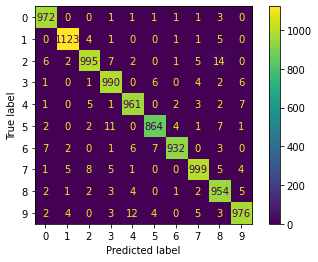

In [62]:
# Visualizando a Matriz de Confusão do modelo
cm = confusion_matrix(labels_teste, labels_preditas)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
_ = disp.plot(values_format='d')

In [63]:
# Classification Report
print(metrics.classification_report(labels_teste, labels_preditas))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



O Classification Report nos mostra a porcentagem de acertos em cada elemento da label, o que podemos concluir que o modelo performou muito bem em todas as categorias e nos mostra mais algumas métricas de avaliação que reforçam a acurácia mostrada anteriormente.

In [64]:
# Verificando a quantidade de cada elemento na label real
np.unique(labels_teste, return_counts =True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

In [65]:
# Verificando a quantidade de cada elemento na label predita
np.unique(labels_preditas, return_counts =True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 994, 1137, 1017, 1023,  987,  882,  942, 1021,  998,  999]))

Nas duas verificações acima, podemos ver a diferença entre a quantidade real de cada elemento e o que o modelo classificou. 

### Considerações finais:

- A partir das visualizações acima, podemos concluir que o modelo performou bem em todas as categorias, tendo poucos erros, tendo assim uma grande quantidade de acertos. 
- Tendo uma acurácia de 0.99 nos dados de treino e 0.97 nos dados de teste.
- Como próximos passos, poderiam ser acrescentadas outras camadas a fim de obter mais melhorias no modelo. 